In [1]:
import time
import re
import pylab as pl
import numpy as np
import pylab as pl

from datetime import datetime, timedelta

import subprocess

import os
import pandas as pd

import concurrent.futures


from joblib import Parallel, delayed
import shutil


from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

In [2]:

os.system('gcloud compute instances delete --zone=europe-west3-c --quiet $(gcloud compute instances list --format="value(name)")')
os.system('gcloud compute instances delete --zone=asia-south1-c --quiet $(gcloud compute instances list --format="value(name)")')
os.system('gcloud compute instances delete --zone=us-west1-b --quiet $(gcloud compute instances list --format="value(name)")')   


ERROR: (gcloud.compute.instances.delete) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-00' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-01' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-02' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-03' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-04' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-05' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-06' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-07' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/inst

Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-00].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-01].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-02].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-03].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-04].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-05].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-06].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-07].
Deleted [https://www.googleapis.com/comp

0

In [3]:

def str2datetime(s):
    parts = s.split('.')
    dt = datetime.strptime(parts[0], "%Y-%m-%d %H:%M:%S")
    return dt.replace(microsecond=int(parts[1]))


def remove_outliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    removedList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
        else:
            removedList.append(y)
    return (resultList, removedList)
def getThroughput(experiment):

    result = subprocess.check_output('cat ../'+experiment+'/nohup_client_*', shell=True)


    result = result.decode("utf-8") 

    lines = result.split('\n')

    commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
#     commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

    Times = []
    lats = []

    for line in lines:
        m = commit_pat.match(line)
        if m:
            try:

                time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
                float((line.split(' ')[1]).split(':')[2])
                Times.append(time_item)        

                lats.append(float(m.group(2)))
            except:
                continue


    begin_time = None
    values = []
    interval = 1
    cnt = 0
    Times.sort()
    for timestamp in Times:
        if begin_time is None:
            begin_time = timestamp
            next_begin_time = timestamp +interval

        while timestamp >= next_begin_time:
            begin_time = next_begin_time
            next_begin_time += interval
            values.append(cnt)
            cnt = 0
        cnt += 1
    values.append(cnt)

#     lats, _ = remove_outliers(lats)
#     print(len(values))


    return np.arange(len(values))*interval,np.array(values)/interval, lats

In [4]:
# p = subprocess.Popen(['../../hotstuff-keygen', ' --num', '--n', str(4)],
#                      stdout=subprocess.PIPE, stderr=open(os.devnull, 'w'))

In [5]:
# print([[t[4:] for t in l.decode('ascii').split()] for l in p.stdout])
# # [[t for t in l.decode('ascii').split()] for l in p.stdout.read()]

In [6]:
# os.system('echo 3108 | sudo -S sh job_mini.sh '+ 'test')


In [7]:
# regions= ['us-west-1', 'ap-south-1']
# regions= ['ap-south-1', 'eu-central-1', 'us-west-2']
# regions= ['ap-south-1', 'eu-central-1']
regions= ['ap-south-1']


instance_type = 't2.small'

In [8]:
# df

In [9]:

# # Node config for remote view change and leader/non leader failures

# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 0, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 0, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 0, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 0, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 0, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 0, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 0, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 0, 'FKA.pem', -1, 19,
# 20, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 21, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,



In [10]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 1, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 1, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 1, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 1, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 1, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 1, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 1, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 1, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 17, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,
# 18, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,
# 19, 'ap-south-1', 1, -1, 'FKA.pem', 3, -1,
# 20, 'eu-central-1', 0, 2, 'FKE.pem', -1, 16,
# 21, 'eu-central-1', 0, 2, 'FKE.pem', -1, 17,
# 22, 'eu-central-1', 0, 2, 'FKE.pem', -1, 18,
# 23, 'eu-central-1', 0, 2, 'FKE.pem', -1, 19,
# 24, 'eu-central-1', 0, 2, 'FKE.pem', -1, 20,
# 25, 'eu-central-1', 0, 2, 'FKE.pem', -1, 21,
# 26, 'eu-central-1', 0, 2, 'FKE.pem', -1, 22,
# 27, 'eu-central-1', 0, 2, 'FKE.pem', -1, 23,
# 28, 'eu-central-1', 0, 3, 'FKE.pem', -1, 24,
# 29, 'eu-central-1', 0, 3, 'FKE.pem', -1, 25,
# 30, 'eu-central-1', 0, 3, 'FKE.pem', -1, 26,
# 31, 'eu-central-1', 0, 3, 'FKE.pem', -1, 27,
# 32, 'eu-central-1', 0, 3, 'FKE.pem', -1, 28,
# 33, 'eu-central-1', 0, 3, 'FKE.pem', -1, 29,
# 34, 'eu-central-1', 0, 3, 'FKE.pem', -1, 30,
# 35, 'eu-central-1', 0, 3, 'FKE.pem', -1, 31,
# 36, 'eu-central-1', 1, -1, 'FKE.pem', 4, -1,
# 37, 'eu-central-1', 1, -1, 'FKE.pem', 5, -1,
# 38, 'eu-central-1', 1, -1, 'FKE.pem', 6, -1,
# 39, 'eu-central-1', 1, -1, 'FKE.pem', 7, -1,
# 40, 'us-west-2', 0, 4, 'FKU2.pem', -1, 32,
# 41, 'us-west-2', 0, 4, 'FKU2.pem', -1, 33,
# 42, 'us-west-2', 0, 4, 'FKU2.pem', -1, 34,
# 43, 'us-west-2', 0, 4, 'FKU2.pem', -1, 35,
# 44, 'us-west-2', 0, 4, 'FKU2.pem', -1, 36,
# 45, 'us-west-2', 0, 4, 'FKU2.pem', -1, 37,
# 46, 'us-west-2', 0, 4, 'FKU2.pem', -1, 38,
# 47, 'us-west-2', 0, 4, 'FKU2.pem', -1, 39,
# 48, 'us-west-2', 0, 5, 'FKU2.pem', -1, 40,
# 49, 'us-west-2', 0, 5, 'FKU2.pem', -1, 41,
# 50, 'us-west-2', 0, 5, 'FKU2.pem', -1, 42,
# 51, 'us-west-2', 0, 5, 'FKU2.pem', -1, 43,
# 52, 'us-west-2', 0, 5, 'FKU2.pem', -1, 44,
# 53, 'us-west-2', 0, 5, 'FKU2.pem', -1, 45,
# 54, 'us-west-2', 0, 5, 'FKU2.pem', -1, 46,
# 55, 'us-west-2', 0, 5, 'FKU2.pem', -1, 47,
# 56, 'us-west-2', 1, -1, 'FKU2.pem', 8, -1,
# 57, 'us-west-2', 1, -1, 'FKU2.pem', 9, -1,
# 58, 'us-west-2', 1, -1, 'FKU2.pem', 10, -1,
# 59, 'us-west-2', 1, -1, 'FKU2.pem', 11, -1,

In [11]:
%%file node_info.csv
node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
0, 'us-west1-b', 0, 0, 'FKA.pem', -1, 0,
1, 'us-west1-b', 0, 0, 'FKA.pem', -1, 1,
2, 'us-west1-b', 0, 0, 'FKA.pem', -1, 2,
3, 'us-west1-b', 0, 0, 'FKA.pem', -1, 3,
4, 'us-west1-b', 0, 1, 'FKA.pem', -1, 4,
5, 'us-west1-b', 0, 1, 'FKA.pem', -1, 5,
6, 'us-west1-b', 0, 1, 'FKA.pem', -1, 6,
7, 'us-west1-b', 0, 1, 'FKA.pem', -1, 7,
8, 'us-west1-b', 0, 2, 'FKA.pem', -1, 8,
9, 'us-west1-b', 0, 2, 'FKA.pem', -1, 9,
10, 'us-west1-b', 0, 2, 'FKA.pem', -1, 10,
11, 'us-west1-b', 0, 2, 'FKA.pem', -1, 11,
12, 'us-west1-b', 0, 3, 'FKA.pem', -1, 12,
13, 'us-west1-b', 0, 3, 'FKA.pem', -1, 13,
14, 'us-west1-b', 0, 3, 'FKA.pem', -1, 14,
15, 'us-west1-b', 0, 3, 'FKA.pem', -1, 15,
16, 'us-west1-b', 0, 4, 'FKA.pem', -1, 16,
17, 'us-west1-b', 0, 4, 'FKA.pem', -1, 17,
18, 'us-west1-b', 0, 4, 'FKA.pem', -1, 18,
19, 'us-west1-b', 0, 4, 'FKA.pem', -1, 19,
20, 'us-west1-b', 0, 5,'FKA.pem', -1, 20,
21, 'us-west1-b', 0, 5,'FKA.pem', -1, 21,
22, 'us-west1-b', 0, 5,'FKA.pem', -1, 22,
23, 'us-west1-b', 0, 5,'FKA.pem', -1, 23,
24, 'us-west1-b', 0, 6,'FKA.pem', -1, 24,
25, 'us-west1-b', 0, 6,'FKA.pem', -1, 25,
26, 'us-west1-b', 0, 6,'FKA.pem', -1, 26,
27, 'us-west1-b', 0, 6,'FKA.pem', -1, 27,
28, 'us-west1-b', 0, 7,'FKA.pem', -1, 28,
29, 'us-west1-b', 0, 7,'FKA.pem', -1, 29,
30, 'us-west1-b', 0, 7,'FKA.pem', -1, 30,
31, 'us-west1-b', 0, 7,'FKA.pem', -1, 31,
32, 'us-west1-b', 0, 8,'FKA.pem', -1, 32,
33, 'us-west1-b', 0, 8,'FKA.pem', -1, 33,
34, 'us-west1-b', 0, 8,'FKA.pem', -1, 34,
35, 'us-west1-b', 0, 8,'FKA.pem', -1, 35,
36, 'us-west1-b', 0, 9,'FKA.pem', -1, 36,
37, 'us-west1-b', 0, 9,'FKA.pem', -1, 37,
38, 'us-west1-b', 0, 9,'FKA.pem', -1, 38,
39, 'us-west1-b', 0, 9,'FKA.pem', -1, 39,
40, 'us-west1-b', 0, 10,'FKA.pem', -1, 40,
41, 'us-west1-b', 0, 10,'FKA.pem', -1, 41,
42, 'us-west1-b', 0, 10, 'FKA.pem', -1, 42,
43, 'us-west1-b', 0, 10, 'FKA.pem', -1, 43,
44, 'us-west1-b', 0, 11, 'FKA.pem', -1, 44,
45, 'us-west1-b', 0, 11, 'FKA.pem', -1, 45,
46, 'us-west1-b', 0, 11, 'FKA.pem', -1, 46,
47, 'us-west1-b', 0, 11, 'FKA.pem', -1, 47,
48, 'us-west1-b', 1, -1, 'FKA.pem', 0, -1,
49, 'us-west1-b', 1, -1, 'FKA.pem', 1, -1,
50, 'us-west1-b', 1, -1, 'FKA.pem', 2, -1,
51, 'us-west1-b', 1, -1, 'FKA.pem', 3, -1,
52, 'us-west1-b', 1, -1, 'FKA.pem', 4, -1,
53, 'us-west1-b', 1, -1, 'FKA.pem', 5, -1,
54, 'us-west1-b', 1, -1, 'FKA.pem', 6, -1,
55, 'us-west1-b', 1, -1, 'FKA.pem', 7, -1,
56, 'us-west1-b', 1, -1, 'FKA.pem', 8, -1,
57, 'us-west1-b', 1, -1, 'FKA.pem', 9, -1,
58, 'us-west1-b', 1, -1, 'FKA.pem', 10, -1,
59, 'us-west1-b', 1, -1, 'FKA.pem', 11, -1,


Overwriting node_info.csv


In [12]:
df =pd.read_csv('node_info.csv')

node_info_dict = df.to_dict()

node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59},
 'region': {0: " 'us-west1-b'",
  1: " 'us-west1-b'",
  2: " 'us-west1-b'",
  3: " 'us-west1-b'",
  4: " 'us-west1-b'",
  5: " 'us-west1-b'",
  6: " 'us-west1-b'",
  7: " 'us-west1-b'",
  8: " 'us-west1-b'",
  9: " 'us-west1-b'",
  10: " 'us-west1-b'",
  11: " 'us-west1-b'",
  12: " 'us-west1-b'",
  13: " 'us-west1-b'",
  14: " 'us-west1-b'",
  15: " 'us-west1-b'",
  16: " 'us-west1-b'",
  17: " 'us-west1

In [13]:
lines  = []



for node_id in node_info_dict['node_id'].keys():
#     print(node_id, node_info_dict['node_id'][node_id], node_info_dict['region'][node_id])

    lim = node_info_dict['node_id'][node_id]
    reg = node_info_dict['region'][node_id].strip().replace('\'', '')

#     print(reg)

    cmd = 'gcloud compute instances create resdb-'+f"{lim:02}"+' --project=ucr-ursa-major-lesani-lab --zone='+reg+' --machine-type=e2-highmem-2 --network-interface=network-tier=PREMIUM,stack-type=IPV4_ONLY,subnet=default --can-ip-forward --maintenance-policy=MIGRATE --provisioning-model=STANDARD --service-account=961693926925-compute@developer.gserviceaccount.com --scopes=https://www.googleapis.com/auth/devstorage.read_only,https://www.googleapis.com/auth/logging.write,https://www.googleapis.com/auth/monitoring.write,https://www.googleapis.com/auth/servicecontrol,https://www.googleapis.com/auth/service.management.readonly,https://www.googleapis.com/auth/trace.append --tags=http-server,https-server --create-disk=auto-delete=yes,boot=yes,device-name=instance-3,image=projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831,mode=rw,size=10,type=projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/diskTypes/pd-balanced --no-shielded-secure-boot --shielded-vtpm --shielded-integrity-monitoring --labels=goog-ec-src=vm_add-gcloud --reservation-affinity=any'
#     cmd = 'gcloud compute instances create resdb-'+f"{lim:02}"+' --project=ucr-ursa-major-lesani-lab --zone='+reg+' --machine-type=e2-small --network-interface=network-tier=PREMIUM,stack-type=IPV4_ONLY,subnet=default --can-ip-forward --maintenance-policy=MIGRATE --provisioning-model=STANDARD --service-account=961693926925-compute@developer.gserviceaccount.com --scopes=https://www.googleapis.com/auth/devstorage.read_only,https://www.googleapis.com/auth/logging.write,https://www.googleapis.com/auth/monitoring.write,https://www.googleapis.com/auth/servicecontrol,https://www.googleapis.com/auth/service.management.readonly,https://www.googleapis.com/auth/trace.append --tags=http-server,https-server --create-disk=auto-delete=yes,boot=yes,device-name=instance-3,image=projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831,mode=rw,size=10,type=projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/diskTypes/pd-balanced --no-shielded-secure-boot --shielded-vtpm --shielded-integrity-monitoring --labels=goog-ec-src=vm_add-gcloud --reservation-affinity=any'

    lines.append(cmd)


lines

['gcloud compute instances create resdb-00 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --machine-type=e2-highmem-2 --network-interface=network-tier=PREMIUM,stack-type=IPV4_ONLY,subnet=default --can-ip-forward --maintenance-policy=MIGRATE --provisioning-model=STANDARD --service-account=961693926925-compute@developer.gserviceaccount.com --scopes=https://www.googleapis.com/auth/devstorage.read_only,https://www.googleapis.com/auth/logging.write,https://www.googleapis.com/auth/monitoring.write,https://www.googleapis.com/auth/servicecontrol,https://www.googleapis.com/auth/service.management.readonly,https://www.googleapis.com/auth/trace.append --tags=http-server,https-server --create-disk=auto-delete=yes,boot=yes,device-name=instance-3,image=projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831,mode=rw,size=10,type=projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/diskTypes/pd-balanced --no-shielded-secure-boot --shielded-vtpm --shielded-integrity-monitoring --labels

In [14]:

def run_command(command):
    subprocess.call(command, shell=True)

commands = lines

# Create a ThreadPoolExecutor or ProcessPoolExecutor, depending on your needs
with concurrent.futures.ThreadPoolExecutor(max_workers=len(commands)) as executor:
    # Submit each command to the executor for parallel execution
    futures = [executor.submit(run_command, command) for command in commands]

    # Wait for all tasks to complete
    concurrent.futures.wait(futures)


instance_type = 'e2-small'


redirect = '>'

os.system('gcloud compute instances list  --format="value(networkInterfaces[0].networkIP)" '+\
          redirect+' all_internal_ips')



os.system('gcloud compute instances list --format="value(networkInterfaces[0].networkIP)" '+\
      redirect+' all_external_ips')



Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-37].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-37  us-west1-b  e2-highmem-2               10.138.0.27  34.105.10.55  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-03].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-03  us-west1-b  e2-highmem-2               10.138.0.29  104.199.126.27  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-44].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-13].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-13  us-west1-b  e2-highmem-2               10.138.0.32  35.247.127.110  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-44  us-west1-b  e2-highmem-2               10.138.0.30  34.168.198.77  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-23].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-23  us-west1-b  e2-highmem-2               10.138.0.9   35.233.152.0  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-32].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-21].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-32  us-west1-b  e2-highmem-2               10.138.0.33  34.168.9.116  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-40].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-47].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-21  us-west1-b  e2-highmem-2               10.138.0.40  35.230.127.93  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-50].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-40  us-west1-b  e2-highmem-2               10.138.0.25  34.168.167.247  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-47  us-west1-b  e2-highmem-2               10.138.0.48  35.197.3.235  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-07].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-35].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-50  us-west1-b  e2-highmem-2               10.138.0.55  34.168.147.20  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP   STATUS
resdb-07  us-west1-b  e2-highmem-2               10.138.0.108  35.185.251.5  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP    STATUS
resdb-35  us-west1-b  e2-highmem-2               10.138.0.104  104.198.107.5  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-26].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-59].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-46].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-56].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement 

NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-59  us-west1-b  e2-highmem-2               10.138.0.92  34.83.155.249  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-26  us-west1-b  e2-highmem-2               10.138.0.85  34.83.148.127  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-46  us-west1-b  e2-highmem-2               10.138.0.73  34.168.254.140  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP    STATUS
resdb-56  us-west1-b  e2-highmem-2               10.138.0.105  34.168.196.63  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-52].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-38].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-29].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-10].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-33].
Crea

NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP    STATUS
resdb-52  us-west1-b  e2-highmem-2               10.138.15.199  34.127.76.143  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP    STATUS
resdb-57  us-west1-b  e2-highmem-2               10.138.0.114  35.247.93.202  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-11].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-01].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-36].
Created [https://www.googleapis.com/compute/v1

NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP   STATUS
resdb-29  us-west1-b  e2-highmem-2               10.138.15.195  34.82.52.251  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-38  us-west1-b  e2-highmem-2               10.138.0.68  34.168.41.115  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-10  us-west1-b  e2-highmem-2               10.138.0.47  34.82.176.207  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-49  us-west1-b  e2-highmem-2               10.138.0.86  35.230.30.117  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-18].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-00].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-25].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-33  us-west1-b  e2-highmem-2               10.138.0.58  34.82.16.211  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP  STATUS
resdb-19  us-west1-b  e2-highmem-2               10.138.0.99  35.230.2.7   RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP    STATUS
resdb-11  us-west1-b  e2-highmem-2               10.138.15.198  34.83.121.201  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP     STATUS
resdb-01  us-west1-b  e2-highmem-2               10.138.15.192  35.233.180.231  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP    STATUS
resdb-36  us-west1-b  e2-highmem-2               10.138.0.127  104.198.111.4  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-28].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-12].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images

NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP    STATUS
resdb-04  us-west1-b  e2-highmem-2               10.138.0.101  35.247.39.122  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP     STATUS
resdb-00  us-west1-b  e2-highmem-2               10.138.0.115  34.127.101.122  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP    STATUS
resdb-18  us-west1-b  e2-highmem-2               10.138.0.117  35.233.147.50  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP    STATUS
resdb-25  us-west1-b  e2-highmem-2               10.138.15.208  35.185.201.96  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-15].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-31].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-06].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-28  us-west1-b  e2-highmem-2               10.138.0.41  34.105.125.175  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-12  us-west1-b  e2-highmem-2               10.138.0.50  34.168.232.253  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP    STATUS
resdb-34  us-west1-b  e2-highmem-2               10.138.15.201  35.185.242.46  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP   STATUS
resdb-51  us-west1-b  e2-highmem-2               10.138.15.222  34.83.15.131  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-02].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-27].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-17].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-15  us-west1-b  e2-highmem-2               10.138.0.95  34.83.228.94  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP    STATUS
resdb-31  us-west1-b  e2-highmem-2               10.138.0.100  35.233.178.56  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-06  us-west1-b  e2-highmem-2               10.138.0.34  34.83.176.98  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-48].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP   STATUS
resdb-27  us-west1-b  e2-highmem-2               10.138.0.111  34.82.72.219  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-02  us-west1-b  e2-highmem-2               10.138.0.89  34.105.45.68  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-17  us-west1-b  e2-highmem-2               10.138.0.45  104.198.1.135  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP   STATUS
resdb-48  us-west1-b  e2-highmem-2               10.138.0.121  35.247.15.80  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-05].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-53].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-55].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-09].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-22].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Crea

NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-05  us-west1-b  e2-highmem-2               10.138.0.49  35.230.91.15  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-53  us-west1-b  e2-highmem-2               10.138.0.72  34.82.68.210  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP     STATUS
resdb-55  us-west1-b  e2-highmem-2               10.138.0.118  35.227.142.198  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-09  us-west1-b  e2-highmem-2               10.138.0.38  34.127.44.252  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP   STATUS
resdb-22  us-west1-b  e2-highmem-2               10.138.15.224  34.83.242.27  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-39].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-58  us-west1-b  e2-highmem-2               10.138.0.63  34.83.68.185  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP     STATUS
resdb-54  us-west1-b  e2-highmem-2               10.138.0.123  34.168.222.210  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-45].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP     STATUS
resdb-39  us-west1-b  e2-highmem-2               10.138.15.217  35.203.159.255  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-45  us-west1-b  e2-highmem-2               10.138.0.84  34.168.213.6  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-30].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-41].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-20].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-43].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-14].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-30  us-west1-b  e2-highmem-2               10.138.0.82  34.105.108.128  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP    STATUS
resdb-41  us-west1-b  e2-highmem-2               10.138.15.203  34.145.125.59  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP    STATUS
resdb-20  us-west1-b  e2-highmem-2               10.138.15.200  34.168.32.199  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-43  us-west1-b  e2-highmem-2               10.138.0.59  35.203.176.43  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-24].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-08].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-14  us-west1-b  e2-highmem-2               10.138.0.62  34.83.206.244  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-42].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-16].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP   STATUS
resdb-24  us-west1-b  e2-highmem-2               10.138.15.209  34.168.95.68  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-08  us-west1-b  e2-highmem-2               10.138.0.46  35.233.191.70  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP  STATUS
resdb-16  us-west1-b  e2-highmem-2               10.138.15.218  34.83.80.0   RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP   STATUS
resdb-42  us-west1-b  e2-highmem-2               10.138.0.125  35.197.29.86  RUNNING


0

In [15]:
!cat all_internal_ips
! echo " " 
# !cat all_external_ips

10.138.0.115
10.138.15.192
10.138.0.89
10.138.0.29
10.138.0.101
10.138.0.49
10.138.0.34
10.138.0.108
10.138.0.46
10.138.0.38
10.138.0.47
10.138.15.198
10.138.0.50
10.138.0.32
10.138.0.62
10.138.0.95
10.138.15.218
10.138.0.45
10.138.0.117
10.138.0.99
10.138.15.200
10.138.0.40
10.138.15.224
10.138.0.9
10.138.15.209
10.138.15.208
10.138.0.85
10.138.0.111
10.138.0.41
10.138.15.195
10.138.0.82
10.138.0.100
10.138.0.33
10.138.0.58
10.138.15.201
10.138.0.104
10.138.0.127
10.138.0.27
10.138.0.68
10.138.15.217
10.138.0.25
10.138.15.203
10.138.0.125
10.138.0.59
10.138.0.30
10.138.0.84
10.138.0.73
10.138.0.48
10.138.0.121
10.138.0.86
10.138.0.55
10.138.15.222
10.138.15.199
10.138.0.72
10.138.0.123
10.138.0.118
10.138.0.105
10.138.0.114
10.138.0.63
10.138.0.92
 


In [16]:
f = open('all_external_ips', "r")
data1 = [line.strip() for line in f.readlines()]

data1 = [x for x in data1 if x!='None']

In [17]:
f = open('all_internal_ips', "r")
data2 = [line.strip() for line in f.readlines()]

data2 = [x for x in data2 if x!='None']

In [18]:
data2, len(data2)

(['10.138.0.115',
  '10.138.15.192',
  '10.138.0.89',
  '10.138.0.29',
  '10.138.0.101',
  '10.138.0.49',
  '10.138.0.34',
  '10.138.0.108',
  '10.138.0.46',
  '10.138.0.38',
  '10.138.0.47',
  '10.138.15.198',
  '10.138.0.50',
  '10.138.0.32',
  '10.138.0.62',
  '10.138.0.95',
  '10.138.15.218',
  '10.138.0.45',
  '10.138.0.117',
  '10.138.0.99',
  '10.138.15.200',
  '10.138.0.40',
  '10.138.15.224',
  '10.138.0.9',
  '10.138.15.209',
  '10.138.15.208',
  '10.138.0.85',
  '10.138.0.111',
  '10.138.0.41',
  '10.138.15.195',
  '10.138.0.82',
  '10.138.0.100',
  '10.138.0.33',
  '10.138.0.58',
  '10.138.15.201',
  '10.138.0.104',
  '10.138.0.127',
  '10.138.0.27',
  '10.138.0.68',
  '10.138.15.217',
  '10.138.0.25',
  '10.138.15.203',
  '10.138.0.125',
  '10.138.0.59',
  '10.138.0.30',
  '10.138.0.84',
  '10.138.0.73',
  '10.138.0.48',
  '10.138.0.121',
  '10.138.0.86',
  '10.138.0.55',
  '10.138.15.222',
  '10.138.15.199',
  '10.138.0.72',
  '10.138.0.123',
  '10.138.0.118',
  '10.138.0

In [19]:
data = []

In [20]:
# for i in range(len(data1)):
#     if data1[i]!='None':
# #         data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')
    

skip_instances = 0
    
for i in range(skip_instances, len(data1)):
    if data1[i]!='None':
        data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')

In [21]:
data, len(data)

(['10.138.0.115    10.138.0.115',
  '10.138.15.192    10.138.15.192',
  '10.138.0.89    10.138.0.89',
  '10.138.0.29    10.138.0.29',
  '10.138.0.101    10.138.0.101',
  '10.138.0.49    10.138.0.49',
  '10.138.0.34    10.138.0.34',
  '10.138.0.108    10.138.0.108',
  '10.138.0.46    10.138.0.46',
  '10.138.0.38    10.138.0.38',
  '10.138.0.47    10.138.0.47',
  '10.138.15.198    10.138.15.198',
  '10.138.0.50    10.138.0.50',
  '10.138.0.32    10.138.0.32',
  '10.138.0.62    10.138.0.62',
  '10.138.0.95    10.138.0.95',
  '10.138.15.218    10.138.15.218',
  '10.138.0.45    10.138.0.45',
  '10.138.0.117    10.138.0.117',
  '10.138.0.99    10.138.0.99',
  '10.138.15.200    10.138.15.200',
  '10.138.0.40    10.138.0.40',
  '10.138.15.224    10.138.15.224',
  '10.138.0.9    10.138.0.9',
  '10.138.15.209    10.138.15.209',
  '10.138.15.208    10.138.15.208',
  '10.138.0.85    10.138.0.85',
  '10.138.0.111    10.138.0.111',
  '10.138.0.41    10.138.0.41',
  '10.138.15.195    10.138.15.195',


In [22]:
for index, item in enumerate(data1):
    if 'publicIP' not in node_info_dict.keys():
        node_info_dict['publicIP'] = {}

        
    node_info_dict['publicIP'][index] = item 
    
    
for index, item in enumerate(data2):
    if 'privateIP' not in node_info_dict.keys():
        node_info_dict['privateIP'] = {}
        
    node_info_dict['privateIP'][index] = item 
    
    
    
for index, item in enumerate(data):
    if 'publicAndprivateIP' not in node_info_dict.keys():
        node_info_dict['publicAndprivateIP'] = {}
        
    node_info_dict['publicAndprivateIP'][index] = item 

In [23]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59},
 'region': {0: " 'us-west1-b'",
  1: " 'us-west1-b'",
  2: " 'us-west1-b'",
  3: " 'us-west1-b'",
  4: " 'us-west1-b'",
  5: " 'us-west1-b'",
  6: " 'us-west1-b'",
  7: " 'us-west1-b'",
  8: " 'us-west1-b'",
  9: " 'us-west1-b'",
  10: " 'us-west1-b'",
  11: " 'us-west1-b'",
  12: " 'us-west1-b'",
  13: " 'us-west1-b'",
  14: " 'us-west1-b'",
  15: " 'us-west1-b'",
  16: " 'us-west1-b'",
  17: " 'us-west1

In [24]:
for item in node_info_dict['publicAndprivateIP']:
    print(node_info_dict['publicAndprivateIP'][item])

10.138.0.115    10.138.0.115
10.138.15.192    10.138.15.192
10.138.0.89    10.138.0.89
10.138.0.29    10.138.0.29
10.138.0.101    10.138.0.101
10.138.0.49    10.138.0.49
10.138.0.34    10.138.0.34
10.138.0.108    10.138.0.108
10.138.0.46    10.138.0.46
10.138.0.38    10.138.0.38
10.138.0.47    10.138.0.47
10.138.15.198    10.138.15.198
10.138.0.50    10.138.0.50
10.138.0.32    10.138.0.32
10.138.0.62    10.138.0.62
10.138.0.95    10.138.0.95
10.138.15.218    10.138.15.218
10.138.0.45    10.138.0.45
10.138.0.117    10.138.0.117
10.138.0.99    10.138.0.99
10.138.15.200    10.138.15.200
10.138.0.40    10.138.0.40
10.138.15.224    10.138.15.224
10.138.0.9    10.138.0.9
10.138.15.209    10.138.15.209
10.138.15.208    10.138.15.208
10.138.0.85    10.138.0.85
10.138.0.111    10.138.0.111
10.138.0.41    10.138.0.41
10.138.15.195    10.138.15.195
10.138.0.82    10.138.0.82
10.138.0.100    10.138.0.100
10.138.0.33    10.138.0.33
10.138.0.58    10.138.0.58
10.138.15.201    10.138.15.201
10.138.0.

In [25]:
with open('replicas.txt', 'w') as f:
    
    for item in node_info_dict['publicAndprivateIP']:
        
        if (node_info_dict['ServerOrClientregion'][item] ==0):
            f.write("%s\n" % node_info_dict['publicAndprivateIP'][item])
    

In [26]:
node_info_dict['ServerOrClientregion']

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 1}

In [27]:
! cat replicas.txt

10.138.0.115    10.138.0.115
10.138.15.192    10.138.15.192
10.138.0.89    10.138.0.89
10.138.0.29    10.138.0.29
10.138.0.101    10.138.0.101
10.138.0.49    10.138.0.49
10.138.0.34    10.138.0.34
10.138.0.108    10.138.0.108
10.138.0.46    10.138.0.46
10.138.0.38    10.138.0.38
10.138.0.47    10.138.0.47
10.138.15.198    10.138.15.198
10.138.0.50    10.138.0.50
10.138.0.32    10.138.0.32
10.138.0.62    10.138.0.62
10.138.0.95    10.138.0.95
10.138.15.218    10.138.15.218
10.138.0.45    10.138.0.45
10.138.0.117    10.138.0.117
10.138.0.99    10.138.0.99
10.138.15.200    10.138.15.200
10.138.0.40    10.138.0.40
10.138.15.224    10.138.15.224
10.138.0.9    10.138.0.9
10.138.15.209    10.138.15.209
10.138.15.208    10.138.15.208
10.138.0.85    10.138.0.85
10.138.0.111    10.138.0.111
10.138.0.41    10.138.0.41
10.138.15.195    10.138.15.195
10.138.0.82    10.138.0.82
10.138.0.100    10.138.0.100
10.138.0.33    10.138.0.33
10.138.0.58    10.138.0.58
10.138.15.201    10.138.15.201
10.138.0.

In [28]:
with open('clients.txt', 'w') as f:
    
    for item in node_info_dict['publicIP']:
        
        if (node_info_dict['ServerOrClientregion'][item] ==1):
            f.write("%s\n" % node_info_dict['publicIP'][item])

In [29]:
os.system('cat clients.txt')

10.138.0.121
10.138.0.86
10.138.0.55
10.138.15.222
10.138.15.199
10.138.0.72
10.138.0.123
10.138.0.118
10.138.0.105
10.138.0.114
10.138.0.63
10.138.0.92


0

In [30]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59},
 'region': {0: " 'us-west1-b'",
  1: " 'us-west1-b'",
  2: " 'us-west1-b'",
  3: " 'us-west1-b'",
  4: " 'us-west1-b'",
  5: " 'us-west1-b'",
  6: " 'us-west1-b'",
  7: " 'us-west1-b'",
  8: " 'us-west1-b'",
  9: " 'us-west1-b'",
  10: " 'us-west1-b'",
  11: " 'us-west1-b'",
  12: " 'us-west1-b'",
  13: " 'us-west1-b'",
  14: " 'us-west1-b'",
  15: " 'us-west1-b'",
  16: " 'us-west1-b'",
  17: " 'us-west1

In [31]:
# def run_server_node_remote(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None' and( ip in nodeIps):
        
        
#         current = (ip.split('.'))
#         command = './examples/hotstuff-app --conf hotstuff.gen-sec'+str(nodeIps.index(ip))+'.conf '
        
#         print(i,command)
        
        
        
# for i in range(len(lines)):
#     print(i)
#     run_server_node_remote(i)
    
    

        
# def run_client_node_remote(i):
#     ip = lines[i]
#     if ip!='None' and( ip in clientIps):
        
#         current = (ip.split('.'))
#         command = './examples/hotstuff-client --idx 0 --iter -1 --max-async 5 >../nohup.out 2>&1 &"'
        
#         print(command)

# for i in range(len(lines)):
#     print(i)
#     run_client_node_remote(i)


In [32]:
# # # os.system('echo 3108 | sudo -S ls')/FinalKeys.pem

# # experiment = 'exp_f1'

# # os.system('echo 3108 | sudo -S sh job_mini1.sh '+experiment)

# # os.system('./run_cli.sh new '+experiment+'_cli;')
# # os.system('sleep 30;')
# # kill_nodes(3)

# # # run_server_node(3)

# # os.system('sleep 30;')

# # os.system('./run_cli.sh stop '+experiment+'_cli;')
# # os.system('./run.sh stop '+experiment+';')
# # os.system('./run_cli.sh fetch '+experiment+'_cli;')
# # os.system('cat '+experiment+'_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')



# def run_server_node(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None':

#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd /home/ubuntu/testbed/'+experiment+'/0/conf/; sudo nohup ../../../../libhotstuff/examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'+experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

#         print(command)
#         os.system(command)
        
        
# def run_node(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None' and ip in lines[:nnodes]:

#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf > ../temp/nohup_'+str(i)+'.out 2>&1 &'

#         print(command)
#         os.system(command)
        
        
# def run_client(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 4 > ../temp/nohup_client_'+str(i)+'.out 2>&1 &'
        
#         print(command)
#         os.system(command)
        
        
        
# def run_client2(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 4 > ../temp/nohup_client_'+str(i)+'_2.out 2>&1 &'
        
#         print(command)
#         os.system(command)
        
        
        
# # def run_join_node(i):
# #     ip = lines[i]
# #     if ip!='None':
        
# #         current = (ip.split('.'))
# #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'
# #         +experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
# #         print(command)
# #         os.system(command)
        

        

# # def kill_nodes(i):
# #     ip = lines[i]
    
# #     if ip!='None':
# #         current = (ip.split('.'))
# #         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hotstuffO; sudo killall hotstuff-app; sudo killall hotstuff-client;"'
        
# #         output = subprocess.getoutput(command)
# #         print(output)

        



# # # run_server_node(3)

# # # current



# # os.system('cat exp_4c5n_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')

In [33]:

def setup_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"'

        print(command)

        output = os.system(command)
        print(output)


def setup_remote2(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))



        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; git pull;"'

        print(command)

        output = os.system(command)
        print(output)


def git_pull_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo git pull;"'


        output = subprocess.getoutput(command)
        print(output)


        
# def run_join_node_remote(i):
#     ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip == nodeIps[-1]):
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
#         print(command)
#         os.system(command)
        
        
        
# def run_join_node1_remote(i):
#     ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip == nodeIps[-1]):
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
#         print(command)
#         os.system(command)
        
# def run_join_node2_remote(i):
#     ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip == nodeIps[-2]):
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
#         print(command)
#         os.system(command)
        
# def run_join_node3_remote(i):
#     ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip == nodeIps[-3]):
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
#         print(command)
#         os.system(command)

        


def kill_nodes_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None':
        current = (ip.split('.'))

        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo killall hotstuff-app; sudo killall hotstuff-client;"'


        output = subprocess.getoutput(command)
        print(output)



def clean_nodes_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None':
        current = (ip.split('.'))

        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -f nohup.out;"'


        print(command)
        os.system(command)




In [34]:
experiment = 'test'
os.system('rm hotstuff.gen*')
os.system('echo 3108 | sudo -S sh job_mini.sh '+ experiment)

os.system('cp hotstuff.gen* ../../')

Name of TestRun: test
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found suitable version "3.0.2", minimum required is "1.1.0")  
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found version "3.0.2")  
-- Could NOT find Doxygen (missing: DOXYGEN_EXECUTABLE) 
-- Configuring done


[sudo] password for tejas: CMake Warning:
  No source or binary directory provided.  Both will be assumed to be the
  same as the current working directory, but note that this warning will
  become a fatal error in future CMake releases.




-- Generating done
-- Build files have been written to: /home/tejas/work/hotstuffO
[ 21%] Built target libsecp256k1
Consolidate compiler generated dependencies of target hotstuff
Consolidate compiler generated dependencies of target salticidae
[ 37%] Built target hotstuff
[ 62%] Built target salticidae
[ 64%] Built target salticidae_static
[ 67%] Built target salticidae_shared
[ 70%] Built target hotstuff_shared
[ 72%] Built target hotstuff_static
Consolidate compiler generated dependencies of target hotstuff-keygen
Consolidate compiler generated dependencies of target hotstuff-tls-keygen
Consolidate compiler generated dependencies of target test_secp256k1
Consolidate compiler generated dependencies of target hotstuff-app
[ 83%] Built target hotstuff-tls-keygen
[ 83%] Built target hotstuff-keygen
[ 89%] Built target test_secp256k1
Consolidate compiler generated dependencies of target hotstuff-client
[ 94%] Built target hotstuff-app
[100%] Built target hotstuff-client
48 ../../hotstuff-

0

In [35]:
import os
os.system('cd ../../; git add .; git commit -m "Testing"; git push -f')

[main 40d49d0] Testing
 106 files changed, 3211 insertions(+), 14311 deletions(-)
 rewrite hotstuff.gen-sec0.conf (91%)
 rewrite hotstuff.gen-sec1.conf (91%)
 rewrite hotstuff.gen-sec10.conf (91%)
 rewrite hotstuff.gen-sec11.conf (91%)
 rewrite hotstuff.gen-sec12.conf (91%)
 rewrite hotstuff.gen-sec13.conf (91%)
 rewrite hotstuff.gen-sec14.conf (91%)
 rewrite hotstuff.gen-sec15.conf (91%)
 rewrite hotstuff.gen-sec16.conf (91%)
 rewrite hotstuff.gen-sec17.conf (91%)
 rewrite hotstuff.gen-sec18.conf (91%)
 rewrite hotstuff.gen-sec19.conf (91%)
 rewrite hotstuff.gen-sec2.conf (91%)
 rewrite hotstuff.gen-sec20.conf (91%)
 rewrite hotstuff.gen-sec21.conf (91%)
 rewrite hotstuff.gen-sec22.conf (91%)
 rewrite hotstuff.gen-sec23.conf (91%)
 rewrite hotstuff.gen-sec24.conf (91%)
 rewrite hotstuff.gen-sec25.conf (90%)
 rewrite hotstuff.gen-sec26.conf (91%)
 rewrite hotstuff.gen-sec27.conf (91%)
 rewrite hotstuff.gen-sec28.conf (91%)
 rewrite hotstuff.gen-sec29.conf (91%)
 rewrite hotstuff.gen-se

To github.com:tmane002/hotstuffO.git
   0efefff..40d49d0  main -> main


0

In [36]:

# # def setup_remote3(i):

# #     ip = node_info_dict['publicIP'][i] 
# #     if ip!='None':
# #         current = (ip.split('.'))
# #         command = 'echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
# #                       +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"'
# #         print(command)
        
# #         output = os.system(command)
# #         print(output)


# results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote)(i)\
#                                                                        for i in [9])#node_info_dict['node_id'])


# print(results)  

In [37]:
# results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote)(i)\
#                                                                        for i in [0])


# print(results)  


In [38]:
    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  


    
# for i in node_info_dict['publicIP']:
#     print(i)
#     setup_remote2(i)

ssh: connect to host 34.127.101.122 port 22: Connection refused

Recommendation: To check for possible causes of SSH connectivity issues and get
recommendations, rerun the ssh command with the --troubleshoot option.

gcloud compute ssh resdb-00 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot

Or, to investigate an IAP tunneling issue:

gcloud compute ssh resdb-00 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot --tunnel-through-iap

ERROR: (gcloud.compute.ssh) [/usr/bin/ssh] exited with return code [255].
ssh: connect to host 35.230.2.7 port 22: Connection refused

Recommendation: To check for possible causes of SSH connectivity issues and get
recommendations, rerun the ssh command with the --troubleshoot option.

gcloud compute ssh resdb-19 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot

Or, to investigate an IAP tunneling issue:

gcloud compute ssh resdb-19 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troublesh

ssh: connect to host 34.83.228.94 port 22: Connection refused

Recommendation: To check for possible causes of SSH connectivity issues and get
recommendations, rerun the ssh command with the --troubleshoot option.

gcloud compute ssh resdb-15 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot

Or, to investigate an IAP tunneling issue:

gcloud compute ssh resdb-15 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot --tunnel-through-iap

ERROR: (gcloud.compute.ssh) [/usr/bin/ssh] exited with return code [255].
ssh: connect to host 35.230.91.15 port 22: Connection refused

Recommendation: To check for possible causes of SSH connectivity issues and get
recommendations, rerun the ssh command with the --troubleshoot option.

gcloud compute ssh resdb-05 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot

Or, to investigate an IAP tunneling issue:

gcloud compute ssh resdb-05 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troublesh

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease


ssh: connect to host 34.145.125.59 port 22: Connection refused

Recommendation: To check for possible causes of SSH connectivity issues and get
recommendations, rerun the ssh command with the --troubleshoot option.

gcloud compute ssh resdb-41 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot

Or, to investigate an IAP tunneling issue:

gcloud compute ssh resdb-41 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot --tunnel-through-iap

ERROR: (gcloud.compute.ssh) [/usr/bin/ssh] exited with return code [255].
ssh: connect to host 35.185.251.5 port 22: Connection refused

Recommendation: To check for possible causes of SSH connectivity issues and get
recommendations, rerun the ssh command with the --troubleshoot option.

gcloud compute ssh resdb-07 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot

Or, to investigate an IAP tunneling issue:

gcloud compute ssh resdb-07 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubles

Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2647 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]


ssh: connect to host 34.105.108.128 port 22: Connection refused

Recommendation: To check for possible causes of SSH connectivity issues and get
recommendations, rerun the ssh command with the --troubleshoot option.

gcloud compute ssh resdb-30 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot

Or, to investigate an IAP tunneling issue:

gcloud compute ssh resdb-30 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot --tunnel-through-iap

ERROR: (gcloud.compute.ssh) [/usr/bin/ssh] exited with return code [255].


ssh: connect to host 35.185.201.96 port 22: Connection refused

Recommendation: To check for possible causes of SSH connectivity issues and get
recommendations, rerun the ssh command with the --troubleshoot option.

gcloud compute ssh resdb-25 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot

Or, to investigate an IAP tunneling issue:

gcloud compute ssh resdb-25 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --trou

Get:6 http://archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [406 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2461 kB]


Get:10 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [343 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:12 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [929 kB]
Get:13 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [195 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:14 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:15 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]


ssh: connect to host 35.197.29.86 port 22: Connection refused

Recommendation: To check for possible causes of SSH connectivity issues and get
recommendations, rerun the ssh command with the --troubleshoot option.

gcloud compute ssh resdb-42 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot

Or, to investigate an IAP tunneling issue:

gcloud compute ssh resdb-42 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot --tunnel-through-iap

ERROR: (gcloud.compute.ssh) [/usr/bin/ssh] exited with return code [255].
ssh: connect to host 34.168.213.6 port 22: Connection refused

Recommendation: To check for possible causes of SSH connectivity issues and get
recommendations, rerun the ssh command with the --troubleshoot option.

gcloud compute ssh resdb-45 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot

Or, to investigate an IAP tunneling issue:

gcloud compute ssh resdb-45 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troublesh

Get:5 http://archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:16 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:17 http://archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:18 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:19 http://archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:20 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:21 http://archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:22 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:23 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3028 kB]


ssh: connect to host 34.82.72.219 port 22: Connection refused

Recommendation: To check for possible causes of SSH connectivity issues and get
recommendations, rerun the ssh command with the --troubleshoot option.

gcloud compute ssh resdb-27 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot

Or, to investigate an IAP tunneling issue:

gcloud compute ssh resdb-27 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot --tunnel-through-iap

ERROR: (gcloud.compute.ssh) [/usr/bin/ssh] exited with return code [255].




Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:24 http://archive.ubuntu.com/ubuntu focal-updates/main Translation-en [489 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2647 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:10 http://archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:11 http://archive.ubuntu.com/

ssh: connect to host 34.83.68.185 port 22: Connection refused

Recommendation: To check for possible causes of SSH connectivity issues and get
recommendations, rerun the ssh command with the --troubleshoot option.

gcloud compute ssh resdb-58 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot

Or, to investigate an IAP tunneling issue:

gcloud compute ssh resdb-58 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot --tunnel-through-iap

ERROR: (gcloud.compute.ssh) [/usr/bin/ssh] exited with return code [255].
ssh: connect to host 35.227.142.198 port 22: Connection refused

Recommendation: To check for possible causes of SSH connectivity issues and get
recommendations, rerun the ssh command with the --troubleshoot option.

gcloud compute ssh resdb-55 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --troubleshoot

Or, to investigate an IAP tunneling issue:

gcloud compute ssh resdb-55 --project=ucr-ursa-major-lesani-lab --zone=us-west1-b --trouble

Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main Translation-en [489 kB]
Get:14 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:15 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2579 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:16 http://archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [360 kB]
Get:17 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:18 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1154 kB]
Get:19 http://archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [277 kB]
Get:25 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:20 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:21 http://archive.ubuntu.com/ubuntu focal-updates/multiverse amd

Get:28 http://archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:29 http://archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:30 http://archive.ubuntu.com/ubuntu focal-backports/universe amd64 c-n-f Metadata [880 B]
Get:31 http://archive.ubuntu.com/ubuntu focal-backports/multiverse amd64 c-n-f Metadata [116 B]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [489 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2579 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [360 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://us-west1.gce.archive.ubuntu.com

Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [929 kB]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [195 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [406 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2461 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [406 kB]
Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [343 kB]
Get:1 http://security.ubuntu.com/ubuntu focal-security I

Get:11 http://archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:14 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:15 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [343 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:16 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [929 kB]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:1 http://us-wes

Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:27 http://archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [360 kB]
Get:36 http://archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:28 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:29 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1154 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:30 http://archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [277 kB]
Get:31 http://archive.ubuntu.c

Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2647 kB]
Get:35 http://archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:36 http://archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:37 http://archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:38 http://archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:39 http://archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:40 http://archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:41 http://archive.ubuntu.com/ubuntu focal-backports/universe amd64 c-n-f Metadata [880 B]
Get:42 http://archive.ubuntu.com/ubuntu focal-backports/multiverse amd64 c-n-f Metadata [116 B]
Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:37 http://archive.ubuntu.com/ubunt

Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:40 http://archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.

Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:14 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2579 kB]
Get:30 http://archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [277 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:31 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:32 http://archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [26.1 kB]
Get:33 http://archive.ubuntu.com/ubuntu focal-updates/multiverse Translation-en [7768 B]
Get:34 http://archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 c-n-f Metadata [620 B]
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata

Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1154 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [277 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [343 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [26.1 kB]
Get:21 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse Translation-en [7768 B]
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 c-n-f Metadata [620 B]
Hit:2 http:

Get:18 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [195 kB]
Get:18 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:25 http://archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:26 http://archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:27 http://archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:28 http://archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [25.0 kB]
Get:29 http://archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1154 kB]
Get:30 http://archive.ubuntu.com/ubuntu focal-backports/universe amd64 c-n-f Metadata [880 B]
Get:31 http://archive.ubuntu.com/ubuntu focal-backports/multivers

Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [406 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:30 http://archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [277 kB]
Get:31 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:32 http://archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [26.1 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:33 http://archive.ubuntu.com/ubuntu focal-updates/multiverse Translation-en [7768 B]
Get:34 http://archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 c-n-f Metadata [620 B]
Get:8 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:25 http://us-wes

Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [343 kB]
Get:31 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2647 kB]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [929 kB]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [195 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:16 http://archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [36

Get:19 http://archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [343 kB]
Get:25 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [343 kB]
Get:20 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:21 http://archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [929 kB]
Get:22 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:23 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3028 kB]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:38 http://security.ubuntu

Get:26 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2579 kB]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [195 kB]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [406 kB]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2461 kB]
Get:40 http://archive.ubuntu.com/ubuntu focal-backports/universe Translation-en [16.3 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [343 kB]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [92


Building dependency tree...
Reading state information...
Package build-essential is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Reading package lists...
Building dependency tree...

E: Package 'build-essential' has no installation candidate


E: Package 'autoconf' has no installation candidate
E: Package 'libtool' has no installation candidate
E: Package 'cmake' has no installation candidate
E: Package 'pkg-config' has no installation candidate
E: Unable to locate package cmake-data
E: Package 'make' has no installation candidate
rm: cannot remove 'hotstuffO': No such file or directory



Reading state information...
Package make is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package pkg-config is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package cmake is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package autoconf is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package libtool is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source



Cloning into 'hotstuffO'...



Building dependency tree...Fetched 29.7 MB in 8s (3876 kB/s)
Reading package lists...
Reading state information...
88 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...


Building dependency tree...
Reading state information...
Package build-essential is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Reading package lists...
Building dependency tree...

E: Package 'build-essential' has no installation candidate


E: Package 'autoconf' has no installation candidate
E: Package 'libtool' has no installation candidate
E: Package 'cmake' has no installation candidate
E: Package 'pkg-config' has no installation candidate
E: Unable to locate package cmake-data
E: Package 'make' has no installation candidate
rm: cannot remove 'hotstuffO': No such file or directory



Reading state information...
Package make is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package pkg-config is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package cmake is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package autoconf is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package libtool is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Fetched 29.7 MB in 8s (3910 kB/s)
Reading package lists...Fetched 29.7 MB in 8s (

Cloning into 'hotstuffO'...


Fetched 29.7 MB in 8s (3808 kB/s)
Reading package lists...
Building dependency tree...
Reading state information...
88 packages can be upgraded. Run 'apt list --upgradable' to see them.
Fetched 29.7 MB in 8s (3657 kB/s)
Reading package lists...Reading package lists...

Fetched 29.7 MB in 8s (3826 kB/s)
Reading package lists...
Building dependency tree...
Reading state information...
Package build-essential is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Fetched 29.7 MB in 8s (3741 kB/s)
Reading package lists...Fetched 29.7 MB in 8s (3902 kB/s)
Reading package lists...Reading package lists...
Building dependency tree...

E: Package 'build-essential' has no installation candidate


E: Package 'autoconf' has no installation candidate
E: Package 'libtool' has no installation candidate
E: Package 'cmake' has no installation candidate
E: Package 'pkg-config' has no installation candidate
E: Unable to locate package cmake-data
E: Package 'make' has no installation candidate
rm: cannot remove 'hotstuffO': No such file or directory




Reading state information...
Building dependency tree...Package make is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package pkg-config is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package cmake is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package autoconf is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package libtool is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source


Building dependency tree...Fetched 29.7 MB in 8s (35

Cloning into 'hotstuffO'...







Reading state information...
Fetched 29.7 MB in 8s (3818 kB/s)
Reading package lists...88 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading state information...
88 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...Reading package lists...
Building dependency tree...Fetched 29.7 MB in 8s (3710 kB/s)
Reading package lists...
Building dependency tree...Fetched 29.7 MB in 8s (3661 kB/s)
Reading package lists...

Reading state information...

Building dependency tree...Building dependency tree...88 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading state information...
Reading package lists...Package build-essential is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source


Reading state information...
Package build-essential is not available, but is referred to by another package.
This may mean t



E: Package 'build-essential' has no installation candidate
E: Package 'build-essential' has no installation candidate








Reading package lists...
Building dependency tree...Reading package lists...
Building dependency tree...
Reading state information...
88 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading state information...
Package make is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package pkg-config is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package cmake is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package autoconf is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package libtool is not available, but is referred to by

E: Package 'autoconf' has no installation candidate
E: Package 'libtool' has no installation candidate
E: Package 'cmake' has no installation candidate
E: Package 'pkg-config' has no installation candidate
E: Unable to locate package cmake-data
E: Package 'make' has no installation candidate
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
E: Package 'autoconf' has no installation candidate
E: Package 'libtool' has no installation candidate
E: Package 'cmake' has no installation candidate
E: Package 'pkg-config' has no installation candidate
E: Unable to locate package cmake-data
E: Package 'make' has no installation candidate
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...



Building dependency tree...
Building dependency tree...Fetched 29.7 MB in 6s (4880 kB/s)
Reading package lists...
Building dependency tree...

Reading state information...
Building dependency tree...Package build-essential is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source


Reading state information...

Building dependency tree...88 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...

E: Package 'build-essential' has no installation candidate




E: Package 'build-essential' has no installation candidate




Reading package lists...
Reading state information...

Building dependency tree...Package build-essential is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source


Building dependency tree...

Reading state information...
Package make is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package pkg-config is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package cmake is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package autoconf is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
i

E: Package 'autoconf' has no installation candidate
E: Package 'libtool' has no installation candidate
E: Package 'cmake' has no installation candidate
E: Package 'pkg-config' has no installation candidate
E: Unable to locate package cmake-data
E: Package 'make' has no installation candidate
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...




E: Package 'autoconf' has no installation candidate
E: Package 'libtool' has no installation candidate
E: Package 'cmake' has no installation candidate
E: Package 'pkg-config' has no installation candidate
E: Unable to locate package cmake-data
E: Package 'make' has no installation candidate
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...





Reading state information...
88 packages can be upgraded. Run 'apt list --upgradable' to see them.
88 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...Reading package lists...
Reading state information...
88 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Reading state information...


Building dependency tree...Building dependency tree...88 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Reading state information...
Package build-essential is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source


Building dependency tree...



E: Package 'build-essential' has no installation candidate




Reading package lists...
Building dependency tree...


Reading state information...
Building dependency tree...Building dependency tree...88 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading state information...
Package make is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package pkg-config is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package cmake is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package autoconf is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package libtool is not available, but is referred t



E: Package 'autoconf' has no installation candidate
E: Package 'libtool' has no installation candidate
E: Package 'cmake' has no installation candidate
E: Package 'pkg-config' has no installation candidate
E: Unable to locate package cmake-data
E: Package 'make' has no installation candidate
rm: cannot remove 'hotstuffO': No such file or directory
E: Package 'build-essential' has no installation candidate
Cloning into 'hotstuffO'...


E: Package 'build-essential' has no installation candidate





Reading package lists...Building dependency tree...
Reading state information...

Building dependency tree...Package build-essential is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source


Reading state information...
Reading package lists...
Building dependency tree...88 packages can be upgraded. Run 'apt list --upgradable' to see them.

Reading state information...
Package make is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package pkg-config is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package cmake is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from anothe



E: Package 'build-essential' has no installation candidate


E: Package 'autoconf' has no installation candidate
E: Package 'libtool' has no installation candidate
E: Package 'cmake' has no installation candidate
E: Package 'pkg-config' has no installation candidate
E: Unable to locate package cmake-data
E: Package 'make' has no installation candidate
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
E: Package 'autoconf' has no installation candidate
E: Package 'libtool' has no installation candidate
E: Package 'cmake' has no installation candidate
E: Package 'pkg-config' has no installation candidate
E: Unable to locate package cmake-data
E: Package 'make' has no installation candidate
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...



Building dependency tree...

Reading state information...
Package make is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package pkg-config is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package cmake is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package autoconf is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package libtool is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Building dependency tree...
Reading state informatio



E: Package 'autoconf' has no installation candidate
E: Package 'libtool' has no installation candidate
E: Package 'cmake' has no installation candidate
E: Package 'pkg-config' has no installation candidate
E: Unable to locate package cmake-data
E: Package 'make' has no installation candidate
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
E: Package 'build-essential' has no installation candidate


E: Package 'build-essential' has no installation candidate


Building dependency tree...Reading package lists...
Building dependency tree...
Reading state information...
Package build-essential is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source


Reading state information...

Reading state information...
Package make is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package pkg-config is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package cmake is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package autoconf is not available, but is referred to by another package.
This may mean that the package is missi





E: Package 'autoconf' has no installation candidate
E: Package 'libtool' has no installation candidate
E: Package 'cmake' has no installation candidate
E: Package 'pkg-config' has no installation candidate
E: Unable to locate package cmake-data
E: Package 'make' has no installation candidate
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
E: Package 'autoconf' has no installation candidate
E: Package 'libtool' has no installation candidate
E: Package 'cmake' has no installation candidate
E: Package 'pkg-config' has no installation candidate
E: Unable to locate package cmake-data
E: Package 'make' has no installation candidate



Building dependency tree...Reading package lists...
Building dependency tree...
Reading state information...
Package make is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package pkg-config is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package cmake is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package autoconf is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package libtool is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source




rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
E: Package 'build-essential' has no installation candidate




Reading package lists...

Building dependency tree...Building dependency tree...
Reading state information...
Package build-essential is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source


Reading state information...
Package make is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package pkg-config is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package cmake is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package autoconf is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is

E: Package 'build-essential' has no installation candidate


E: Package 'autoconf' has no installation candidate
E: Package 'libtool' has no installation candidate
E: Package 'cmake' has no installation candidate
E: Package 'pkg-config' has no installation candidate
E: Unable to locate package cmake-data
E: Package 'make' has no installation candidate
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
E: Package 'autoconf' has no installation candidate
E: Package 'libtool' has no installation candidate
E: Package 'cmake' has no installation candidate
E: Package 'pkg-config' has no installation candidate
E: Unable to locate package cmake-data
E: Package 'make' has no installation candidate
rm: cannot remove 'hotstuffO': No such file or directory



Reading state information...
Package make is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package pkg-config is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package cmake is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package autoconf is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Package libtool is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

Fetched 29.7 MB in 6s (5080 kB/s)
Reading package lists...

Cloning into 'hotstuffO'...


The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6 libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
Suggested packages:
 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Fetched 29.7 MB in 6s (4984 kB/s)
Reading package lists...Fetched 48.2 MB in 1s (58.6 MB/s)

Reading state information...

82 packages can be upgraded. Run 'apt list --upgradable' to see them.
Fetched 29.7 MB in 7s (4198 kB/s)ng database ... 60%
Reading package lists...Reading package lists...(Reading database ... 65%
(Reading database ... 90%..(Reading database ... 70%
Reading state information...
82 packages can be upgraded. Run 'apt list --upgradable' to see them.
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...

Reading state information...
Reading package lists...


Building dependency tree...debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline

Building dependency tree...
Building dependency tree...Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...


Reading state information...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base l

Building dependency tree...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6 libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpage

Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Building dependency tree...1 upgraded, 41 newly installed, 0 to remove and 81 not upgraded.
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
1 upgraded, 41 newly installed, 0 to remove and 81 not upgraded.
Selecting previously unselected package libctf0:amd64.
Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakero

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Fetched 48.2 MB in 1s (66.2 MB/s)
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Get:4 http://us-west1.gce.ar

Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Unpacking binutils (2.34-6ubuntu1.8) ...
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgomp1 amd64 10.5.0-1ubuntu1~20.04 [102 kB]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libitm1 amd64 10.5.0-1ubuntu1~20.04 [26.2 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libatomic1 amd64 10.5.0-1ubuntu1~20.04 [9284 B]
Get:21 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libasan5 amd64 9.4.0-1ubuntu1~20.04.2 [2752 kB]
Selecting previously unselected package libc-dev-bin.
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...

Reading package lists...Unpacking l

  libtsan0 libubsan1 linux-libc-dev make manpages-dev
Suggested packages:
  binutils-doc cpp-doc gcc-9-locales debian-keyring g++-multilib
  g++-9-multilib gcc-9-doc gcc-multilib autoconf automake libtool flex bison
  gdb gcc-doc gcc-9-multilib glibc-doc bzr libstdc++-9-doc make-doc

Reading state information...

Reading state information...
Selecting previously unselected package libcrypt-dev:amd64.
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Selecting previously unselected package libc6-dev:amd64.
Preparing to unpack .../09-libc6-dev_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc6-dev:amd64 (2.31-0ubuntu9.14) ...
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-per

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:39 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-diff-xs-perl amd64 0.04-6 [11.3 kB]
Get:40 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-merge-perl all 0.08-3 [12.0 kB]
Get:41 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfile-fcntllock-perl amd64 0.22-3build4 [33.1 kB]
Get:42 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 manpages-dev all 5.05-1 [2266 kB]
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
1 upgraded, 41 newly installed, 0 to remove and 81 not upgraded.
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Fetched 48.2 MB in 1s (41.7 MB/s)

Reading state information...
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinu

Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgomp1 amd64 10.5.0-1ubuntu1~20.04 [102 kB]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libitm1 amd64 10.5.0-1ubuntu1~20.04 [26.2 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libatomic1 amd64 10.5.0-1ubuntu1~20.04 [9284 B]
Get:21 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libasan5 amd64 9.4.0-1ubuntu1~20.04.2 [2752 kB]
Selecting previously unselected package binutils-x86-64-linux-gnu.
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Unpacki

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Selecting previously unselected package linux-libc-dev:amd64.
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Preparing to unpack .../07-linux-libc-dev_5.4.0-169.187_amd64.deb ...
Reading package lists...Unpacking linux-libc-dev:amd64 (5.4.0-169.187) ...

Building dependency tree...Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:34 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.8) ...
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
Selecting previously unselected package libbinutils:amd64.
Selecting previously unselected package binutils-x86-64-linux-gnu.
Selecting previously unselected package binutils-common:amd64.
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libbinutils:amd64 (2.34-6ubuntu

Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.8) ...
Selecting previously unselected package linux-libc-dev:amd64.
Selecting previously unselected package libc-dev-bin.
Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Selecting previously unselected package binutils.
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Preparing to unpack .../07-linux-libc-dev_5.4.0-169.187_amd64.deb ...
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Unpacking linux-libc-dev:amd64 (5.4.0-169.187) ...
Get:34 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package gcc-9-base:amd64.
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package binutils-common:amd64.
Selecting previously unselected package binutils-common:amd64.
Selecting previously unselected package libisl22:amd64.
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Unpacking libisl22:amd64 (0.22.1-1) ...
(Reading database ... 62221 files and directories currently installed.)
(Reading database ... 62221 files and directories currently installed.).(Reading database ... 100%
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.8) ...
(Reading database ... 95%
Unpacking binutils-common:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package binutils.
Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.8)

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package libisl22:amd64.
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Unpacking libisl22:amd64 (0.22.1-1) ...
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package libctf0:amd64.
Selecting previously unselected package libmpc3:amd64.
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
Unpacking libmpc3:amd64 (1.1.0-1) ...
Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package libisl22:amd64.
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Unpacking libisl22:amd64 (0.22.1-1) ...
Selecting previously unselected package libatomic1:amd64.
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb 

Selecting previously unselected package libctf0:amd64.
Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Selecting previously unselected package libcc1-0:amd64.
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package cpp-9.
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package libatomic1:amd64.
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package cpp.
Preparing to unpack .../14-cpp_4%3a9.3.0-1ubuntu2

Selecting previously unselected package libc6-dev:amd64.
Selecting previously unselected package liblsan0:amd64.
Preparing to unpack .../09-libc6-dev_2.31-0ubuntu9.14_amd64.deb ...
Selecting previously unselected package libtsan0:amd64.
Unpacking libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package binutils.
Unpacking liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.8) ...
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libc-dev-bin.
Selecting previously unselected package libtsan0:amd64.
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpackin

Selecting previously unselected package libalgorithm-diff-xs-perl.
Selecting previously unselected package libatomic1:amd64.
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package gcc-9-base:amd64.
Selecting previously unselected package gcc-9.
Selecting previously unselected package libalgorithm-merge-perl.
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Selecting previously unselected package g++-9.
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Unpacking gcc-9 (9

Selecting previously unselected package libgcc-9-dev:amd64.
Selecting previously unselected package g++-9.
Selecting previously unselected package dpkg-dev.
Selecting previously unselected package cpp.
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../24-libgcc-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Preparing to unpack .../14-cpp_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking cpp (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libcc1-0:amd64.
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package g++-9.
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...

Selecting previously unselected package g++.
Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Setting up binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Selecting previously unselected package dpkg-dev.
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Setting up binutils (2.34-6ubuntu1.8) ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Setting up dpkg-dev (1.19.7ubuntu3.2) ...
Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package build-essential.
Selecting previously unselected package make.
Selecting previously unselected package fakeroot.
Preparing to unpack .../33-build-essential_12.8ubuntu1.1_amd64.deb ...
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Setting up cpp (4:9.3.0-1ubuntu2) ...
Preparing to unpac

Setting up fakeroot (1.24-1) ...
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking g++ (4:9.3.0-1ubuntu2) ...Setting up libbinutils:amd64 (2.34-6ubuntu1.8) ...
Setting up libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...

Setting up libc-dev-bin (2.31-0ubuntu9.14) ...
Setting up libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Setting up libalgorithm-diff-xs-perl (0.04-6) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Setting up libisl22:amd64 (0.22.1-1) ...
Selecting previously unselected package gcc.
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Setting up libbinutils:amd64 (2.34-6ubuntu1.8) ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Setting up make (4.2.1-1.2) ...
Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package make.
Setting up libc-dev-bin (2.31-0ubuntu9.14) ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up liblsan0:amd64 (10.

Selecting previously unselected package g++.
Setting up cpp (4:9.3.0-1ubuntu2) ...
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Selecting previously unselected package gcc.
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package make.
Selecting previously unselected package libalgorithm-merge-perl.
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Unpacking make (4.2.1-1.2) ...
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libalgorit

update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libalgorithm-merge-perl (0.08-3) ...
Setting up build-essential (12.8ubuntu1.1) ...
Processing triggers for man-db (2.9.1-1) ...
Selecting previously unselected package dpkg-dev.
Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Setting up libctf0:amd64 (2.34-6ubuntu1.8) ...
Setting up libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Setting up binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Setting up binutils (2.34-6ubuntu1.8) ...
Setting up manpages-dev (5.05-1) ...
Setting up dpkg-dev (1.19.7ubuntu3.2) ...
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libalgorit

Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up cpp (4:9.3.0-1ubuntu2) ...
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Setting up build-essential (12.8ubuntu1.1) ...
Processing triggers for man-db (2.9.1-1) ...
Setting up manpages-dev (5.05-1) ...
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Setting up libalgorithm-diff-perl (1.19.03-2) ...
Setting up binutils-common:amd64 (2.34-6ubuntu1.8) ...
Setting up linux-libc-dev:amd64 (5.4.0-169.187) ...
Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libfakeroot:amd64 (1.24-1) ...
Setting up fakeroot (1.24-1) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin


Reading state information...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev cmak

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Reading package lists...
Building dependency tree...Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...


Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...

Reading state information...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package librhash0:amd64.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Fetched 10.3 MB in 0s (60.4 MB/s)
Selecting previously unselected package cmake.
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...

Reading state information...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...


Reading package lists...
Building dependency tree...Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk

  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
  libssl1.1
1 upgraded, 14 newly installed, 0 to remove and 80 not upgraded.
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Unpacking libtool (2.4.6-14) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Fetched 10.3 MB in 0s (65.5 MB/s)
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]
Selecting previously unselected package libuv1-dev:amd64.
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libarchive13 amd64 3.4.0-2ubuntu1.2 [327 kB]
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjsoncpp1 amd64 1.7.4-3.1ubuntu2 [75.6 kB]
Get:9 http:

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package librhash0:amd64.
1 upgraded, 14 newly installed, 0 to remove and 80 not upgraded.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Setting up automake (1:1.16.1-4ubuntu6) ...
Unpacking librhash0:amd64 (1.3.9-1) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libtool (2.4.6-14) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubu

Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...

Building dependency tree...Unpacking m4 (1.4.18-4) ...
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libuv1-dev amd64 1.34.2-1ubuntu1.3 [103 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 pkg-config amd64 0.29.1-0ubuntu4 [45.5 kB]
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Reading package lists...
Building dependency tree...Reading package lists...
Building dependency tree...Selecting previously unselected package libarchive13:amd64.


Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...

Reading state information...
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Selecting previously unselected package libtool.
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Selecting previously unselected package librhash0:amd64.
Selecting previously unselected package libuv1-dev:amd64.
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no lon

Setting up librhash0:amd64 (1.3.9-1) ...
Selecting previously unselected package cmake.
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libtool (2.4.6-14) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package libltdl-dev:amd64.
Processing triggers for man-db (2.9.1-1) ...
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer requi

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
Fetched 10.3 MB in 0s (57.2 MB/s)
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
  libssl1.1
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
  libssl1.1
Fetched 10.3 MB in 0s (68.1 MB/s)
1 upgraded, 14 newly installed, 0 to remove and 80 not upgraded.
1 upgraded, 14 newly installed, 0 to remove and 80 not upgraded.
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be u

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Fetched 10.3 MB in 0s (60.9 MB/s)
Fetched 10.3 MB in 0s (63.2 MB/s)
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Selecting previously unselected package cmake-data.
Unpacking libtool (2.4.6-14) ...
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Setting up m4 (1.4.18-4) ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up autotools-dev (20180224.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselected package cmake-data.
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .

Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Fetched 10.3 MB in 0s (58.8 MB/s)
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselected package libarchive13:amd64.

Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Building dependency tree...Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Selecting previously unselected package libarchive13:amd64.
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ..

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjsoncpp1 amd64 1.7.4-3.1ubuntu2 [75.6 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 librhash0 amd64 1.3.9-1 [113 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake amd64 3.16.3-1ubuntu1.20.04.1 [3668 kB]
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up m4 (1.4.18-4) ...
Selecting previously unselected package libltdl-dev:amd64.
Setting up autotools-dev (20180224.1) ...
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up m4 (1.4.18-4) ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu foc

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package pkg-config.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Selecting previously unselected package pkg-config.
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselected package libarchive13:amd64.
P

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...
Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb 

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Selecting previously unselected package libjsoncpp1:amd64.
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package librhash0:amd64.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Selecting previously unselected package cmake.
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Sett

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Selecting previously unselected package pkg-config.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
debconf: unable to

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libtool (2.4.6-14) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...


rm: cannot remove 'hotstuffO': No such file or directory
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
Cloning into 'hotstuffO'...


Processing triggers for install-info (6.7.0.dfsg.2-5) ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [39]:
# compile_remote(0)

In [40]:


def compile_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))


        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"'


        print(command)
        output = os.system(command)
        print(output)






results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                       for i in list(node_info_dict['node_id'].keys()))


print(results)  

bash: line 0: cd: hotstuffO: No such file or directory
bash: ../make_job.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../make_job.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../make_job.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../make_job.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../make_job.out: Permission denied
bash: ../make_job.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../make_job.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../make_job.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../make_job.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../make_job.out: Permission denied
bash: line 0: cd: hotstuffO: No such fil

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [41]:
time.sleep(150)

In [42]:
# def compile_remote(i):

#     ip = node_info_dict['publicIP'][i] 
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#                       +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"'


# #         output = os.system(command)
#         print(command)
    
    
# for i in range(60):
#     compile_remote(i)

In [43]:
# time.sleep(420)

In [44]:



results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [45]:
# node_info_dict

In [46]:
def run_server_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps[:-3]):

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:

        current = (ip.split('.'))


        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'

        print(i,command)
        os.system(command)
        
        
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_server_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])

print(results)  
time.sleep(45)


bash: line 0: cd: hotstuffO: No such file or directory
bash: ../nohup.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../nohup.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../nohup.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../nohup.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../nohup.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../nohup.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../nohup.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../nohup.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../nohup.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../nohup.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../nohup.

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [47]:
# for i in node_info_dict['publicIP']:
#     kill_nodes_remote(i)

In [48]:
# def run_client_node_remote_print(i):
#     ip = node_info_dict['publicIP'][i] 

#     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 5 >../nohup.out 2>&1 &"'
        
#         print(command)

# for i in node_info_dict['publicIP']:
#     run_client_node_remote_print(i)

In [49]:
# def run_server_node_remote(i):
#     ip = node_info_dict['publicIP'][i] 
# #     if ip!='None' and( ip in nodeIps[:-3]):

#     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
#         print(i,command)
# #         os.system(command)
        
# f
        
        

In [50]:
def run_client_node_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:

        current = (ip.split('.'))


        command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 400 >../nohup.out 2>&1 &"'


        print(command)
        os.system(command)



    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])

print(results)  

    
# for i in node_info_dict['publicIP']:
#     run_client_node_remote(i)

bash: line 0: cd: hotstuffO: No such file or directory
bash: ../nohup.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../nohup.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../nohup.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../nohup.out: Permission denied
bash: line 0: cd: hotstuffO: No such file or directory
bash: ../nohup.out: Permission denied


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [51]:
time.sleep(150)

In [52]:

    
# results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(kill_nodes_remote)(i)\
#                                                                        for i in node_info_dict['publicIP'])


for i in node_info_dict['publicIP']:
    print(i)
    kill_nodes_remote(i)

0
bash: line 0: cd: hotstuffO: No such file or directory
hotstuff-app: no process found
hotstuff-client: no process found
1
hotstuff-app: no process found
hotstuff-client: no process found
2
hotstuff-app: no process found
hotstuff-client: no process found
3
hotstuff-client: no process found
4
bash: line 0: cd: hotstuffO: No such file or directory
hotstuff-app: no process found
hotstuff-client: no process found
5
bash: line 0: cd: hotstuffO: No such file or directory
hotstuff-app: no process found
hotstuff-client: no process found
6
bash: line 0: cd: hotstuffO: No such file or directory
hotstuff-app: no process found
hotstuff-client: no process found
7
bash: line 0: cd: hotstuffO: No such file or directory
hotstuff-app: no process found
hotstuff-client: no process found
8
bash: line 0: cd: hotstuffO: No such file or directory
hotstuff-app: no process found
hotstuff-client: no process found
9
bash: line 0: cd: hotstuffO: No such file or directory
hotstuff-app: no process found
hotstuff-c

gcloud compute ssh --zone "us-west1-b" "resdb-44" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
0
gcloud compute ssh --zone "us-west1-b" "resdb-50" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"
0
gcloud compute ssh --zone "us-west1-b" "resdb-40" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -f nohup.out;"
gcloud compute ssh --zone "us-west1-b" "resdb-57" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
0
gcloud compute ssh --zone "us-west1-b" "resdb-39" --proje

gcloud compute ssh --zone "us-west1-b" "resdb-06" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
65280
gcloud compute ssh --zone "us-west1-b" "resdb-08" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"
0
gcloud compute ssh --zone "us-west1-b" "resdb-11" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -f nohup.out;"
7 gcloud compute ssh --zone "us-west1-b" "resdb-07" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec7.conf >../nohup.out 2>&1 &"
gcloud compute ssh --zone "us-west1-b" "resdb-00" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install au

gcloud compute ssh --zone "us-west1-b" "resdb-01" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
0
gcloud compute ssh --zone "us-west1-b" "resdb-34" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"
0
gcloud compute ssh --zone "us-west1-b" "resdb-25" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -f nohup.out;"
6 gcloud compute ssh --zone "us-west1-b" "resdb-06" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec6.conf >../nohup.out 2>&1 &"
gcloud compute ssh --zone "us-west1-b" "resdb-15" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoco

bash: line 0: cd: hotstuffO: No such file or directory
hotstuff-app: no process found
hotstuff-client: no process found
54
gcloud compute ssh --zone "us-west1-b" "resdb-17" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
65280
gcloud compute ssh --zone "us-west1-b" "resdb-11" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"
0
gcloud compute ssh --zone "us-west1-b" "resdb-03" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -f nohup.out;"
27 gcloud compute ssh --zone "us-west1-b" "resdb-27" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec27.conf >../nohup.out 2>&1 &"
gcloud compute ssh --zone "us-west1-b" "resdb-57" --

gcloud compute ssh --zone "us-west1-b" "resdb-51" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
65280
gcloud compute ssh --zone "us-west1-b" "resdb-33" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"
0
gcloud compute ssh --zone "us-west1-b" "resdb-36" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -f nohup.out;"
47 gcloud compute ssh --zone "us-west1-b" "resdb-47" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec47.conf >../nohup.out 2>&1 &"
gcloud compute ssh --zone "us-west1-b" "resdb-50" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx 2 --iter -1 --max-

In [53]:
os.system('cd ../../../dump_files; echo 3108 | sudo -S  rm *')

for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        current = (ip.split('.'))
        command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup.out ../../../dump_files/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)



gcloud compute scp --zone "us-west1-b" resdb-48:/home/tejas/nohup.out ../../../dump_files/nohup_client_0.out


[sudo] password for tejas: rm: cannot remove '*': No such file or directory


gcloud compute scp --zone "us-west1-b" resdb-49:/home/tejas/nohup.out ../../../dump_files/nohup_client_1.out
gcloud compute scp --zone "us-west1-b" resdb-50:/home/tejas/nohup.out ../../../dump_files/nohup_client_2.out
gcloud compute scp --zone "us-west1-b" resdb-51:/home/tejas/nohup.out ../../../dump_files/nohup_client_3.out


scp: /home/tejas/nohup.out: No such file or directory
ERROR: (gcloud.compute.scp) [/usr/bin/scp] exited with return code [1].


gcloud compute scp --zone "us-west1-b" resdb-52:/home/tejas/nohup.out ../../../dump_files/nohup_client_4.out
gcloud compute scp --zone "us-west1-b" resdb-53:/home/tejas/nohup.out ../../../dump_files/nohup_client_5.out


scp: /home/tejas/nohup.out: No such file or directory
ERROR: (gcloud.compute.scp) [/usr/bin/scp] exited with return code [1].


gcloud compute scp --zone "us-west1-b" resdb-54:/home/tejas/nohup.out ../../../dump_files/nohup_client_6.out


scp: /home/tejas/nohup.out: No such file or directory
ERROR: (gcloud.compute.scp) [/usr/bin/scp] exited with return code [1].


gcloud compute scp --zone "us-west1-b" resdb-55:/home/tejas/nohup.out ../../../dump_files/nohup_client_7.out


scp: /home/tejas/nohup.out: No such file or directory
ERROR: (gcloud.compute.scp) [/usr/bin/scp] exited with return code [1].


gcloud compute scp --zone "us-west1-b" resdb-56:/home/tejas/nohup.out ../../../dump_files/nohup_client_8.out
gcloud compute scp --zone "us-west1-b" resdb-57:/home/tejas/nohup.out ../../../dump_files/nohup_client_9.out
gcloud compute scp --zone "us-west1-b" resdb-58:/home/tejas/nohup.out ../../../dump_files/nohup_client_10.out


scp: /home/tejas/nohup.out: No such file or directory
ERROR: (gcloud.compute.scp) [/usr/bin/scp] exited with return code [1].


gcloud compute scp --zone "us-west1-b" resdb-59:/home/tejas/nohup.out ../../../dump_files/nohup_client_11.out


In [54]:
for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        current = (ip.split('.'))
        command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup.out ../../../dump_files/nohup_server_'+str(node_info_dict['ServerID'][i])+'.out'
        print(command)
        os.system(command)
        break

gcloud compute scp --zone "us-west1-b" resdb-00:/home/tejas/nohup.out ../../../dump_files/nohup_server_0.out


scp: /home/tejas/nohup.out: No such file or directory
ERROR: (gcloud.compute.scp) [/usr/bin/scp] exited with return code [1].


In [55]:
# result = subprocess.check_output('cat ../'+experiment+'/nohup_client_*', shell=True)


# result = result.decode("utf-8") 

# lines = result.split('\n')

# #     commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
# commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

# Times = []
# lats = []

# for line in lines:
#     m = commit_pat.match(line)
#     if m:
# #             try:

#             time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
#             float((line.split(' ')[1]).split(':')[2])
#             Times.append(time_item)        

#             lats.append(float(m.group(2)))
#             print(lats[-1])
# #             except:

In [56]:
# lines

In [57]:

# def getThroughput(experiment):

#     result = subprocess.check_output('cat ../'+experiment+'/nohup_client_*', shell=True)


#     result = result.decode("utf-8") 

#     lines = result.split('\n')

#     commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
# #     commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

#     Times = []
#     lats = []

#     for line in lines:
#         m = commit_pat.match(line)
#         if m:
#             try:

#                 time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
#                 float((line.split(' ')[1]).split(':')[2])
#                 Times.append(time_item)        

#                 lats.append(float(m.group(2)))
# #                 print(lats[-1])
#             except:
#                 continue


#     begin_time = None
#     values = []
#     interval = 1
#     cnt = 0
#     Times.sort()
#     for timestamp in Times:
#         if begin_time is None:
#             begin_time = timestamp
#             next_begin_time = timestamp +interval

#         while timestamp >= next_begin_time:
#             begin_time = next_begin_time
#             next_begin_time += interval
#             values.append(cnt)
#             cnt = 0
#         cnt += 1
#     values.append(cnt)
    
# #     lats, _ = remove_outliers(lats)
# #     print(len(values))


#     return np.arange(len(values))*interval,np.array(values)/interval, lats

In [58]:
experiment = '../../dump_files'
X,Y, lats = getThroughput(experiment)


print(np.sum(Y)/len(Y), np.average(lats))

0.0 nan


/home/tejas/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/tejas/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [59]:
lats

[]

In [60]:
lats

[]

In [61]:
np.sum(Y)

0.0

In [62]:
s1, s2 = X[:-2],Y[:-2]

In [63]:
np.average(s2[10:40]),np.average(lats[-33:-3])

(nan, nan)

In [64]:
lats


[]

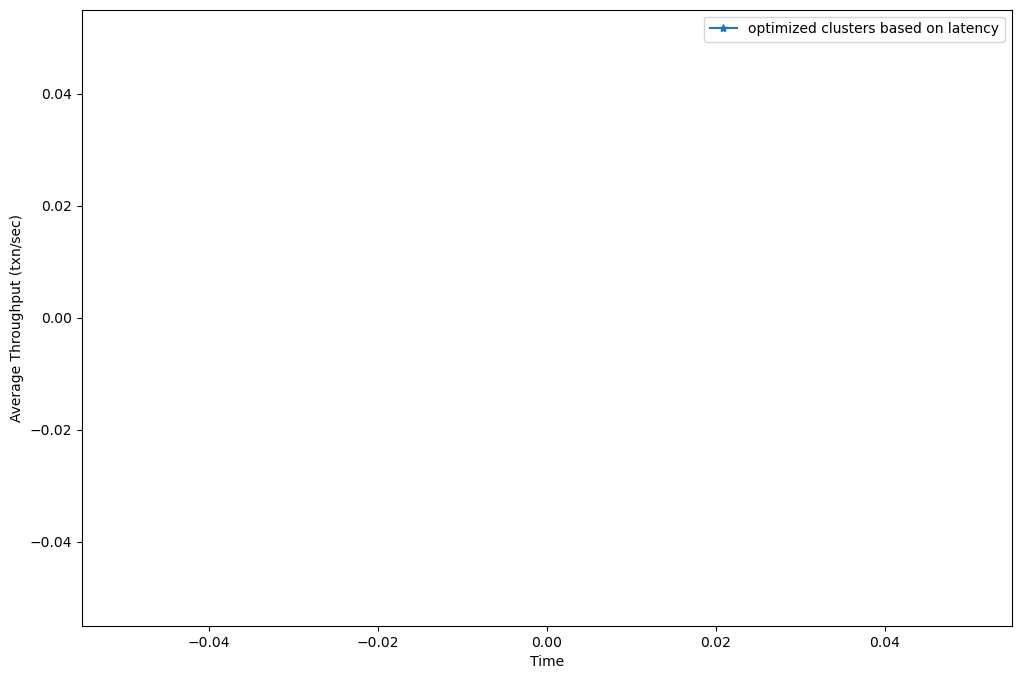

<Figure size 640x480 with 0 Axes>

In [65]:



fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(s1,s2, '-*', label = 'optimized clusters based on latency')


pl.legend()
pl.xlabel('Time')
pl.ylabel('Average Throughput (txn/sec)')
# pl.title('HotStuff Multicluster: Throughput in Optimized Vs Non-Optimized Clusters')

# pl.ylim(0,50)
# pl.savefig('/home/tejas/Desktop/OptClusters.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()

In [66]:
# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# fig.patch.set_facecolor('white')
# pl.plot(s1,s2, '-*', label = 'Hotstuff-MC: Leader Failure')


# pl.legend()
# pl.xlabel('Time')
# pl.ylabel('Throughput (txn/sec)')
# # pl.title('HotStuff Multicluster: Throughput in Optimized Vs Non-Optimized Clusters')

# # pl.ylim(0,50)
# pl.savefig('/home/tejas/Desktop/LeaderFailure_HotStuffMC.png', dpi =150, bbox_inches = 0 )
# pl.show()
# pl.clf()

(0.8, 1.2)

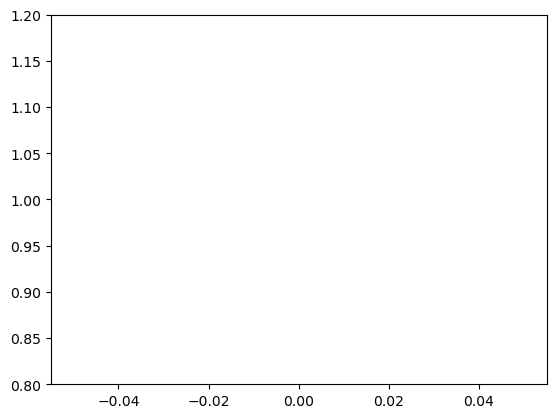

In [67]:
pl.plot(lats)
pl.ylim(0.8,1.2)

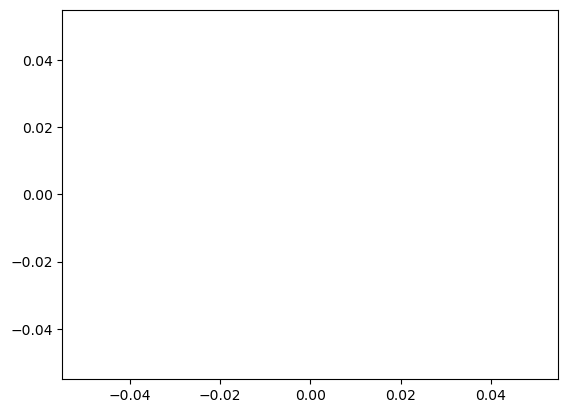

In [68]:
pl.plot(lats)
# pl.ylim(0,0.6)

In [69]:

os.system('gcloud compute instances delete --zone=europe-west3-c --quiet $(gcloud compute instances list --format="value(name)")')
os.system('gcloud compute instances delete --zone=asia-south1-c --quiet $(gcloud compute instances list --format="value(name)")')
os.system('gcloud compute instances delete --zone=us-west1-b --quiet $(gcloud compute instances list --format="value(name)")')   


ERROR: (gcloud.compute.instances.delete) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-00' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-01' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-02' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-03' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-04' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-05' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-06' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-07' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/inst

Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-00].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-01].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-02].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-03].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-04].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-05].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-06].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-07].
Deleted [https://www.googleapis.com/comp

0

In [70]:


# lats

# os.system('grep -n -r "LatencyPlot: new node sending join request message" ../../../dump_files/')

# os.system('grep -n -r "LatencyPlot: Received first message with new node info" ../../../dump_files/')

# os.system('grep -n -r "LatencyPlot: Leader received with tentative sets from all peer nodes" ../../../dump_files/')        

# 1000*(32.776365 - 32.768622)

# os.system('grep -n -r "LatencyPlot: Received second join message" ../../../dump_files/')        

# os.system('grep -n -r "LatencyPlot: Received initial join message" ../../../dump_files/')        

# os.system('grep -n -r "Sending Join Init message with height" ../../../dump_files/')        

# 1000*(17.534818-17.534437)

# os.system('grep -n -r "LatencyPlot: Sent response to  initial join message" ../../../dump_files/')        


    
# os.system('grep -n -r "LatencyPlot: Received second join message" ../../../dump_files/')        

# 17.536482

In [71]:
# os.system('grep -n -r "quorum reached for second join message with cluster_id" ../../../dump_files/')

In [72]:
# os.system('grep -n -r "LatencyPlot: Received 1st MC message" ../../../dump_files/')

In [73]:
# os.system('grep -n -r "LatencyPlot: before sending first mc message" ../../../dump_files/')

In [74]:
# 1000*(32.676090-32.612236)

In [75]:
# os.system('grep -n -r "LatencyPlot: going to execute based on 2nd MC message" ../../../dump_files/')


# os.system('grep -n -r "LatencyPlot: Finished execution" ../../../dump_files/')

# os.system('grep -n -r "LatencyPlot: Processing message from client" ../../../dump_files/')    

In [76]:
# os.system('grep -n -r "LatencyPlot: before initial join message" ../../../dump_files/')    

In [77]:
# # os.system('grep -n -r "LatencyPlot: " ../../../dump_files/')

# 1000*(11.479877-11.479442), 1000*(11.484887-11.479877),1000*(56.048590-56.046569), 1000*(56.050021 - 56.048590)

# # exec, # first mc, #second mc

# 1000*(56.050377 - 56.050181), 1000*(56.049389-56.049025), 1000*(56.050875-56.049389), 1000*(56.046557-56.038591) 


# # with open('opt1.npy', 'wb') as f:
# #     np.save(f, s1)
# #     np.save(f, s2)
    

    
# # with open('opt1.npy', 'rb') as f:
# #     opt1 = np.load(f)
# #     opt2 = np.load(f)
  
    








# # with open('equiCluster1.npy', 'wb') as f:
# #     np.save(f, s1)
# #     np.save(f, s2)
    

    
# # with open('equiCluster1.npy', 'rb') as f:
# #     eq1 = np.load(f)
# #     eq2 = np.load(f)
  
    
    
    
# # with open('equiCluster.npy', 'rb') as f:
# #     eq1 = np.load(f)
# #     eq2 = np.load(f)

    
# # with open('lat.npy', 'rb') as f:
# #     lat1 = np.load(f)
# #     lat2 = np.load(f)

    
    
# # with open('opt.npy', 'rb') as f:
# #     opt1 = np.load(f)
# #     opt2 = np.load(f)


# fig = pl.figure(figsize = (12, 8))
# fig.patch.set_facecolor('white')
# pl.plot(s1,s2, '-*', label = 'optimized clusters based on latency')

# # pl.plot(eq1,eq2, '-*', label = 'optimized clusters: equal clusters (7 (R1),7 (R2)')
# # pl.plot(lat1,lat2, '-*', label = 'optimized clusters: latency (9 (R1),5 (R2))')
# # pl.plot(opt1,opt2, '-*', label = 'optimized clusters: latency and heterogeneity (4 (R1),5 (R1), 5 (R2))')
# pl.legend()
# pl.xlabel('Time')
# pl.ylabel('Average Throughput (txn/sec)')
# # pl.title('HotStuff Multicluster: Throughput in Optimized Vs Non-Optimized Clusters')

# # pl.ylim(0,350)
# # pl.savefig('/home/tejas/Desktop/OptClusters.png', dpi =150, bbox_inches = 0 )
# pl.show()
# pl.clf()

## Single Non-Leader Failure

experiment = 'test'
os.system('rm hotstuff.gen*')
os.system('sh job_mini.sh '+ experiment)

os.system('cp hotstuff.gen* ../../')

os.system('cd ../../; git add .; git commit -m "testing rvc on server"; git push -f')

    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote2)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results) 

def run_server_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps[:-3]):

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
        print(i,command)
        os.system(command)
        
        
    
for i in node_info_dict['publicIP']:
    run_server_node_remote(i)
    
    
time.sleep(20)



def run_client_node_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 40 >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)




    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

    
# for i in node_info_dict['publicIP']:
#     run_client_node_remote(i)

time.sleep(40)

for i in node_info_dict['publicIP']:
    if i==3:
        print(i)
        kill_nodes_remote(i)

time.sleep(45)

for i in node_info_dict['publicIP']:
    kill_nodes_remote(i)


for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)

experiment = '../../dump_files'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(X[:-2],Y[:-2], '-*')
pl.axvline(x=40, ls='--', color = 'red')
pl.xlabel('Time')
pl.ylabel('Average Throughput (txn/sec)')
pl.title('HotStuff Multicluster: Single Non-Leader Failure')

# pl.ylim(0,1000)
pl.savefig('/home/tejas/Desktop/NodeFailure.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()

## Single Leave

## Multiple Non Leader Failure

experiment = 'test'
os.system('rm hotstuff.gen*')
os.system('sh job_mini.sh '+ experiment)

os.system('cp hotstuff.gen* ../../')

os.system('cd ../../; git add .; git commit -m "testing rvc on server"; git push -f')

    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote2)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results) 

def run_server_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps[:-3]):

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
        print(i,command)
        os.system(command)
        
        
    
for i in node_info_dict['publicIP']:
    run_server_node_remote(i)
    
    
time.sleep(20)



def run_client_node_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 40 >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)




    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

    
# for i in node_info_dict['publicIP']:
#     run_client_node_remote(i)

time.sleep(40)

for i in node_info_dict['publicIP']:
    if i==3:
        print(i)
        kill_nodes_remote(i)
        
time.sleep(20)

for i in node_info_dict['publicIP']:
    if i==7:
        print(i)
        kill_nodes_remote(i)
        
time.sleep(20)

for i in node_info_dict['publicIP']:
    if i==11:
        print(i)
        kill_nodes_remote(i)

time.sleep(45)

for i in node_info_dict['publicIP']:
    kill_nodes_remote(i)


for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)

experiment = '../../dump_files'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(X[:-2],Y[:-2], '-*')
pl.axvline(x=40, ls='--', color = 'red')
pl.axvline(x=60, ls='--', color = 'green')
pl.axvline(x=80, ls='--', color = 'blue')

pl.xlabel('Time')
pl.ylabel('Average Throughput (txn/sec)')
pl.title('HotStuff Multicluster: Multiple Non-Leader Failure')

# pl.ylim(0,1000)
pl.savefig('/home/tejas/Desktop/MultiNodeFailure.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()

## Single Leave